In [1]:
#crypto currencies that we use
# SOLANA ---> SOL
# CARDANO---> ADA
# RIPPLE---> XRP
# BINANCE COIN ---> BNB 
# WE WILL USE BNB AS THE DEPENDENT STABLE COIN, AND ADA,SOL,XRP AS THE INDEPENDENT VARIABLES.

In [2]:
import pandas as pd              # API'dan bundan data cekcegiz           
import datetime as dt  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import requests                    
import json
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from arch.unitroot import *
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# import qgrid                     # dataframeleri gostermek icin kullanacagiz                   

,datetime,open,high,low,close,volume,adj_close
2021-01-01 00:00:00,1609448400000,37.1707,37.2063,36.9729,37.0441,27581.494,37.0441
2021-01-01 01:00:00,1609452000000,37.0449,37.3200,36.9195,37.1971,35357.726,37.1971
2021-01-01 02:00:00,1609455600000,37.2113,37.4231,37.0743,37.3588,39132.313,37.3588
2021-01-01 03:00:00,1609459200000,37.3596,37.4423,36.9636,37.3764,95113.826,37.3764
2021-01-01 04:00:00,1609462800000,37.3765,37.9390,37.3353,37.6134,152336.882,37.6134
...,...,...,...,...,...,...,...
2021-02-11 12:00:00,1613034000000,122.9888,124.8000,120.8800,124.4072,252703.423,124.4072
2021-02-11 13:00:00,1613037600000,124.4229,125.5907,122.3203,123.5200,223577.878,123.5200
2021-02-11 14:00:00,1613041200000,123.5085,124.6397,117.7289,118.5257,349704.742,118.5257
2021-02-11 15:00:00,1613044800000,118.5400,122.1079,118.5262,121.9854,294233.250,121.9854


2021-01-01 00:00:00
2021-02-11 16:00:01
2021-03-25 12:00:01
2021-05-06 12:00:01
2021-06-17 07:00:01
2021-07-29 02:00:01
2021-09-09 01:00:01
2021-10-20 22:00:01
2021-12-01 17:00:01
2022-01-12 12:00:01
2022-02-23 07:00:01
2022-04-06 02:00:01
2022-05-10 18:00:01


<AxesSubplot:>

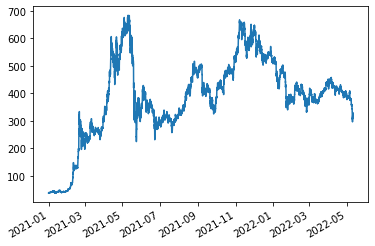

In [3]:
# get data from Binance
def get_data_binance(symbol, interval, startTime, endTime):
     # base point: api.binance.com
     # endpoint: api/v3/klines
    url = "https://api.binance.com/api/v3/klines"
    
    # How many milliseconds have passed since 1970
    startTime = str(int(startTime.timestamp() * 1000))
    endTime = str(int(endTime.timestamp() * 1000))
    limit = '1000' # This is the maximum value in API
 
    # all parameters in dictionary
    req_params = {"symbol" : symbol, 'interval' : interval, 'startTime' : startTime, 'endTime' : endTime, 'limit' : limit}
 
    # We will use requests.get to pull data from API
    # first i convert it to json, then it is more meaningful to Pandas data frame
    df = pd.DataFrame(json.loads(requests.get(url, params = req_params).text))
 
    # eger dataframe empty is None 
    if (len(df.index) == 0):
        return None
     
    # get the first 6 columns on all lines
    df = df.iloc[:, 0:6]
    df.columns = ['datetime', 'open', 'high', 'low', 'close', 'volume']
 
    df.open      = df.open.astype("float")
    df.high      = df.high.astype("float")
    df.low       = df.low.astype("float")
    df.close     = df.close.astype("float")
    df.volume    = df.volume.astype("float")
    
    df['adj_close'] = df['close']
     
    # datetime is a bit confusing let's understand this
    df.index = [dt.datetime.fromtimestamp(x / 1000.0) for x in df.datetime]
 
    return df


# Let's take a data as an example
get_data_binance('BNBUSDT', '1h', dt.datetime(2021, 1, 1), dt.datetime(2021, 9, 6))

# First day of every month in 2021
months = [dt.datetime(2021, i, 1) for i in range(1, 13)]
months.append(dt.datetime(2021, 1, 1))

# call again for each date range
df_list = [get_data_binance('BNBUSDT', '1h', months[i], months[i+1] - dt.timedelta(0, 1)) for i in range(0, len(months) - 1)]

# Then read df concatenate
df = pd.concat(df_list)

df_list = []
last_datetime = dt.datetime(2021,1,1)
while True:
    print(last_datetime)
    new_df = get_data_binance('BNBUSDT', '1h', last_datetime, dt.datetime.now())
    if new_df is None:
        break
    df_list.append(new_df)
    last_datetime = max(new_df.index) + dt.timedelta(0, 1)
 
df = pd.concat(df_list)

	
# qgrid.show_grid(df)


df['close'].astype('float').plot()

df.to_csv('outBNB.csv')

,datetime,open,high,low,close,volume,adj_close
2021-01-01 00:00:00,1609448400000,0.18073,0.18116,0.18029,0.18072,5821192.4,0.18072
2021-01-01 01:00:00,1609452000000,0.18072,0.18099,0.17933,0.17975,6609071.9,0.17975
2021-01-01 02:00:00,1609455600000,0.17976,0.18255,0.17848,0.18134,17174652.2,0.18134
2021-01-01 03:00:00,1609459200000,0.18134,0.18146,0.17831,0.18051,19194919.1,0.18051
2021-01-01 04:00:00,1609462800000,0.18055,0.18469,0.18000,0.18358,28601648.4,0.18358
...,...,...,...,...,...,...,...
2021-02-11 12:00:00,1613034000000,0.90070,0.91500,0.88500,0.91130,38379275.1,0.91130
2021-02-11 13:00:00,1613037600000,0.91155,0.92653,0.90902,0.91100,28286754.3,0.91100
2021-02-11 14:00:00,1613041200000,0.91099,0.91664,0.90000,0.90484,26280480.7,0.90484
2021-02-11 15:00:00,1613044800000,0.90467,0.91950,0.90454,0.90940,23758361.0,0.90940


2021-01-01 00:00:00
2021-02-11 16:00:01
2021-03-25 12:00:01
2021-05-06 12:00:01
2021-06-17 07:00:01
2021-07-29 02:00:01
2021-09-09 01:00:01
2021-10-20 22:00:01
2021-12-01 17:00:01
2022-01-12 12:00:01
2022-02-23 07:00:01
2022-04-06 02:00:01
2022-05-10 18:00:01


<AxesSubplot:>

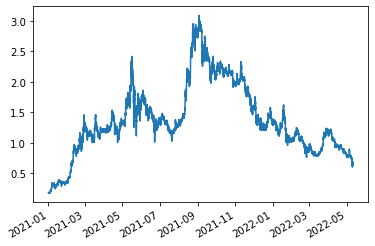

In [4]:
# get data from Binance
def get_data_binance(symbol, interval, startTime, endTime):
      # base point: api.binance.com
     # endpoint: api/v3/klines
    url = "https://api.binance.com/api/v3/klines"
    
    # How many milliseconds have passed since 1970
    startTime = str(int(startTime.timestamp() * 1000))
    endTime = str(int(endTime.timestamp() * 1000))
    limit = '1000' # API'da maximum value bu
 
    #  all parameters in dictionary
    req_params = {"symbol" : symbol, 'interval' : interval, 'startTime' : startTime, 'endTime' : endTime, 'limit' : limit}
 
    # We will use requests.get to pull data from API
    # first i convert it to json, then it is more meaningful to Pandas data frame
    df = pd.DataFrame(json.loads(requests.get(url, params = req_params).text))
 
    #  dataframe empty is None 
    if (len(df.index) == 0):
        return None
     
    # get the first 6 columns on all lines  
    df = df.iloc[:, 0:6]
    df.columns = ['datetime', 'open', 'high', 'low', 'close', 'volume']
 
    df.open      = df.open.astype("float")
    df.high      = df.high.astype("float")
    df.low       = df.low.astype("float")
    df.close     = df.close.astype("float")
    df.volume    = df.volume.astype("float")
    
    df['adj_close'] = df['close']
     
    # datetime is a bit confusing let's understand this
    df.index = [dt.datetime.fromtimestamp(x / 1000.0) for x in df.datetime]
 
    return df


# Let's take a data as an example
get_data_binance('ADAUSDT', '1h', dt.datetime(2021, 1, 1), dt.datetime(2021, 9, 6))

# call again for each date range
months = [dt.datetime(2021, i, 1) for i in range(1, 13)]
months.append(dt.datetime(2021, 1, 1))

# call again for each date range
df_list = [get_data_binance('ADAUSDT', '1h', months[i], months[i+1] - dt.timedelta(0, 1)) for i in range(0, len(months) - 1)]

# Then read df concatenate 
df = pd.concat(df_list)

df_list = []
last_datetime = dt.datetime(2021,1,1)
while True:
    print(last_datetime)
    new_df = get_data_binance('ADAUSDT', '1h', last_datetime, dt.datetime.now())
    if new_df is None:
        break
    df_list.append(new_df)
    last_datetime = max(new_df.index) + dt.timedelta(0, 1)
 
df = pd.concat(df_list)

	
# qgrid.show_grid(df)


df['close'].astype('float').plot()

df.to_csv('outADA.csv')

,datetime,open,high,low,close,volume,adj_close
2021-01-01 00:00:00,1609448400000,1.5214,1.5224,1.5101,1.5183,23782.05,1.5183
2021-01-01 01:00:00,1609452000000,1.5170,1.5235,1.5058,1.5147,32578.11,1.5147
2021-01-01 02:00:00,1609455600000,1.5133,1.5212,1.4906,1.5073,89317.30,1.5073
2021-01-01 03:00:00,1609459200000,1.5088,1.5442,1.4990,1.5442,56894.22,1.5442
2021-01-01 04:00:00,1609462800000,1.5442,1.6100,1.5322,1.5734,256745.01,1.5734
...,...,...,...,...,...,...,...
2021-02-11 12:00:00,1613034000000,9.4649,9.6641,9.3600,9.5880,247134.99,9.5880
2021-02-11 13:00:00,1613037600000,9.5847,9.7425,9.1158,9.1618,864160.28,9.1618
2021-02-11 14:00:00,1613041200000,9.1563,9.2524,9.0652,9.1590,600196.16,9.1590
2021-02-11 15:00:00,1613044800000,9.1578,9.3891,9.1308,9.3246,221453.94,9.3246


2021-01-01 00:00:00
2021-02-11 16:00:01
2021-03-25 12:00:01
2021-05-06 12:00:01
2021-06-17 07:00:01
2021-07-29 02:00:01
2021-09-09 01:00:01
2021-10-20 22:00:01
2021-12-01 17:00:01
2022-01-12 12:00:01
2022-02-23 07:00:01
2022-04-06 02:00:01
2022-05-10 18:00:01


<AxesSubplot:>

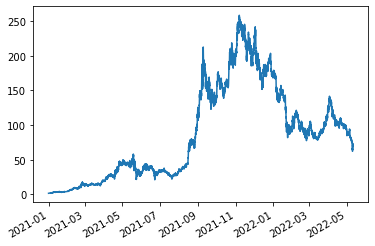

In [5]:
#  get data from Binance
def get_data_binance(symbol, interval, startTime, endTime):
     # base point: api.binance.com
     # endpoint: api/v3/klines
    url = "https://api.binance.com/api/v3/klines"
    
    # How many milliseconds have passed since 1970
    startTime = str(int(startTime.timestamp() * 1000))
    endTime = str(int(endTime.timestamp() * 1000))
    limit = '1000' # API'da maximum value bu
 
    #  all parameters in dictionary
    req_params = {"symbol" : symbol, 'interval' : interval, 'startTime' : startTime, 'endTime' : endTime, 'limit' : limit}
 
    # We will use requests.get to pull data from API
    # first i convert it to json, then it is more meaningful to Pandas data frame
    df = pd.DataFrame(json.loads(requests.get(url, params = req_params).text))
 
 #  dataframe empty is None 
    if (len(df.index) == 0):
        return None
     
   # get the first 6 columns on all lines  
    df = df.iloc[:, 0:6]
    df.columns = ['datetime', 'open', 'high', 'low', 'close', 'volume']
 
    df.open      = df.open.astype("float")
    df.high      = df.high.astype("float")
    df.low       = df.low.astype("float")
    df.close     = df.close.astype("float")
    df.volume    = df.volume.astype("float")
    
    df['adj_close'] = df['close']
     
      # datetime is a bit confusing let's understand this
    df.index = [dt.datetime.fromtimestamp(x / 1000.0) for x in df.datetime]
 
    return df



# Let's take a data as an example
get_data_binance('SOLUSDT', '1h', dt.datetime(2021, 1, 1), dt.datetime(2021, 9, 6))

# first day of every month in 2021
months = [dt.datetime(2021, i, 1) for i in range(1, 13)]
months.append(dt.datetime(2021, 1, 1))

# call again for each date range
df_list = [get_data_binance('SOLUSDT', '1h', months[i], months[i+1] - dt.timedelta(0, 1)) for i in range(0, len(months) - 1)]

# Then read df concatenate 
df = pd.concat(df_list)

df_list = []
last_datetime = dt.datetime(2021,1,1)
while True:
    print(last_datetime)
    new_df = get_data_binance('SOLUSDT', '1h', last_datetime, dt.datetime.now())
    if new_df is None:
        break
    df_list.append(new_df)
    last_datetime = max(new_df.index) + dt.timedelta(0, 1)
 
df = pd.concat(df_list)

	
# qgrid.show_grid(df)


df['close'].astype('float').plot()

df.to_csv('outSOL.csv')

,datetime,open,high,low,close,volume,adj_close
2021-01-01 00:00:00,1609448400000,0.22109,0.22700,0.22099,0.22448,65416353.1,0.22448
2021-01-01 01:00:00,1609452000000,0.22447,0.22863,0.22069,0.22380,49025455.0,0.22380
2021-01-01 02:00:00,1609455600000,0.22376,0.22562,0.21740,0.21959,46548213.9,0.21959
2021-01-01 03:00:00,1609459200000,0.21953,0.22235,0.21600,0.22162,41811263.2,0.22162
2021-01-01 04:00:00,1609462800000,0.22160,0.22695,0.22112,0.22382,50498851.0,0.22382
...,...,...,...,...,...,...,...
2021-02-11 12:00:00,1613034000000,0.51151,0.51500,0.50400,0.51305,46061593.4,0.51305
2021-02-11 13:00:00,1613037600000,0.51308,0.52199,0.50800,0.52007,52820719.2,0.52007
2021-02-11 14:00:00,1613041200000,0.52007,0.52051,0.51069,0.51195,46100261.0,0.51195
2021-02-11 15:00:00,1613044800000,0.51195,0.52687,0.51138,0.52125,61066052.2,0.52125


2021-01-01 00:00:00
2021-02-11 16:00:01
2021-03-25 12:00:01
2021-05-06 12:00:01
2021-06-17 07:00:01
2021-07-29 02:00:01
2021-09-09 01:00:01
2021-10-20 22:00:01
2021-12-01 17:00:01
2022-01-12 12:00:01
2022-02-23 07:00:01
2022-04-06 02:00:01
2022-05-10 18:00:01


<AxesSubplot:>

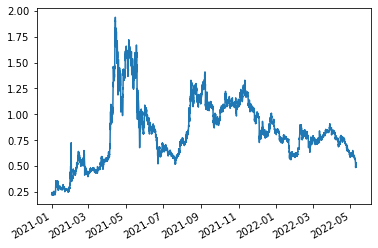

In [6]:
# get data from Binance
def get_data_binance(symbol, interval, startTime, endTime):
     # base point: api.binance.com
     # endpoint: api/v3/klines
    url = "https://api.binance.com/api/v3/klines"
    
   # How many milliseconds have passed since 1970
    startTime = str(int(startTime.timestamp() * 1000))
    endTime = str(int(endTime.timestamp() * 1000))
    limit = '1000' # API'da maximum value bu
 
     #  all parameters in dictionary
    req_params = {"symbol" : symbol, 'interval' : interval, 'startTime' : startTime, 'endTime' : endTime, 'limit' : limit}
 
   # We will use requests.get to pull data from API
    # first i convert it to json, then it is more meaningful to Pandas data frame
    df = pd.DataFrame(json.loads(requests.get(url, params = req_params).text))
 
    #  dataframe empty is None 
    if (len(df.index) == 0):
        return None
     
  # get the first 6 columns on all lines   
    df = df.iloc[:, 0:6]
    df.columns = ['datetime', 'open', 'high', 'low', 'close', 'volume']
 
    df.open      = df.open.astype("float")
    df.high      = df.high.astype("float")
    df.low       = df.low.astype("float")
    df.close     = df.close.astype("float")
    df.volume    = df.volume.astype("float")
    
    df['adj_close'] = df['close']
     
    # datetime is a bit confusing let's understand this
    df.index = [dt.datetime.fromtimestamp(x / 1000.0) for x in df.datetime]
 
    return df

# Let's take a data as an example
get_data_binance('XRPUSDT', '1h', dt.datetime(2021, 1, 1), dt.datetime(2021, 9, 6))

# first day of each month in 2021
months = [dt.datetime(2021, i, 1) for i in range(1, 13)]
months.append(dt.datetime(2021, 1, 1))

# call again for each date range
df_list = [get_data_binance('XRPUSDT', '1h', months[i], months[i+1] - dt.timedelta(0, 1)) for i in range(0, len(months) - 1)]

# Then read df concatenate
df = pd.concat(df_list)

df_list = []
last_datetime = dt.datetime(2021,1,1)
while True:
    print(last_datetime)
    new_df = get_data_binance('XRPUSDT', '1h', last_datetime, dt.datetime.now())
    if new_df is None:
        break
    df_list.append(new_df)
    last_datetime = max(new_df.index) + dt.timedelta(0, 1)
 
df = pd.concat(df_list)

	
# qgrid.show_grid(df)


df['close'].astype('float').plot()

df.to_csv('outXRP.csv')

In [7]:
dfBNBUSDT=pd.read_csv("outBNB.csv")
dfXRPUSDT=pd.read_csv("outXRP.csv")
dfSOLUSDT=pd.read_csv("outSOL.csv")
dfADAUSDT=pd.read_csv("outADA.csv")





In [8]:
dfBNBUSDT

,Unnamed: 0,datetime,open,high,low,close,volume,adj_close
0,2021-01-01 00:00:00,1609448400000,37.1707,37.2063,36.9729,37.0441,27581.494,37.0441
1,2021-01-01 01:00:00,1609452000000,37.0449,37.3200,36.9195,37.1971,35357.726,37.1971
2,2021-01-01 02:00:00,1609455600000,37.2113,37.4231,37.0743,37.3588,39132.313,37.3588
3,2021-01-01 03:00:00,1609459200000,37.3596,37.4423,36.9636,37.3764,95113.826,37.3764
4,2021-01-01 04:00:00,1609462800000,37.3765,37.9390,37.3353,37.6134,152336.882,37.6134
...,...,...,...,...,...,...,...,...
11824,2022-05-10 14:00:00,1652180400000,320.2000,326.8000,318.9000,325.7000,67161.009,325.7000
11825,2022-05-10 15:00:00,1652184000000,325.6000,330.5000,323.4000,329.8000,67925.165,329.8000
11826,2022-05-10 16:00:00,1652187600000,329.8000,331.2000,322.9000,325.7000,89982.553,325.7000
11827,2022-05-10 17:00:00,1652191200000,325.8000,328.9000,315.7000,317.7000,102025.371,317.7000


In [9]:
dfADAUSDT

,Unnamed: 0,datetime,open,high,low,close,volume,adj_close
0,2021-01-01 00:00:00,1609448400000,0.18073,0.18116,0.18029,0.18072,5821192.4,0.18072
1,2021-01-01 01:00:00,1609452000000,0.18072,0.18099,0.17933,0.17975,6609071.9,0.17975
2,2021-01-01 02:00:00,1609455600000,0.17976,0.18255,0.17848,0.18134,17174652.2,0.18134
3,2021-01-01 03:00:00,1609459200000,0.18134,0.18146,0.17831,0.18051,19194919.1,0.18051
4,2021-01-01 04:00:00,1609462800000,0.18055,0.18469,0.18000,0.18358,28601648.4,0.18358
...,...,...,...,...,...,...,...,...
11824,2022-05-10 14:00:00,1652180400000,0.67240,0.68340,0.66860,0.67920,9475269.6,0.67920
11825,2022-05-10 15:00:00,1652184000000,0.67910,0.69350,0.67470,0.69020,11910441.6,0.69020
11826,2022-05-10 16:00:00,1652187600000,0.69030,0.69490,0.67460,0.68620,15323551.2,0.68620
11827,2022-05-10 17:00:00,1652191200000,0.68610,0.69460,0.65570,0.66080,16662561.1,0.66080


In [10]:
dfXRPUSDT

,Unnamed: 0,datetime,open,high,low,close,volume,adj_close
0,2021-01-01 00:00:00,1609448400000,0.22109,0.22700,0.22099,0.22448,65416353.1,0.22448
1,2021-01-01 01:00:00,1609452000000,0.22447,0.22863,0.22069,0.22380,49025455.0,0.22380
2,2021-01-01 02:00:00,1609455600000,0.22376,0.22562,0.21740,0.21959,46548213.9,0.21959
3,2021-01-01 03:00:00,1609459200000,0.21953,0.22235,0.21600,0.22162,41811263.2,0.22162
4,2021-01-01 04:00:00,1609462800000,0.22160,0.22695,0.22112,0.22382,50498851.0,0.22382
...,...,...,...,...,...,...,...,...
11824,2022-05-10 14:00:00,1652180400000,0.51860,0.52900,0.51760,0.52400,24719917.0,0.52400
11825,2022-05-10 15:00:00,1652184000000,0.52390,0.53590,0.52050,0.53350,27466396.0,0.53350
11826,2022-05-10 16:00:00,1652187600000,0.53360,0.53710,0.52000,0.52430,33808855.0,0.52430
11827,2022-05-10 17:00:00,1652191200000,0.52420,0.52950,0.51150,0.51300,36995285.0,0.51300


In [11]:
dfSOLUSDT

,Unnamed: 0,datetime,open,high,low,close,volume,adj_close
0,2021-01-01 00:00:00,1609448400000,1.5214,1.5224,1.5101,1.5183,23782.05,1.5183
1,2021-01-01 01:00:00,1609452000000,1.5170,1.5235,1.5058,1.5147,32578.11,1.5147
2,2021-01-01 02:00:00,1609455600000,1.5133,1.5212,1.4906,1.5073,89317.30,1.5073
3,2021-01-01 03:00:00,1609459200000,1.5088,1.5442,1.4990,1.5442,56894.22,1.5442
4,2021-01-01 04:00:00,1609462800000,1.5442,1.6100,1.5322,1.5734,256745.01,1.5734
...,...,...,...,...,...,...,...,...
11824,2022-05-10 14:00:00,1652180400000,69.1000,72.1000,68.8600,71.5600,311776.66,71.5600
11825,2022-05-10 15:00:00,1652184000000,71.5600,73.8200,71.1400,73.4100,330940.51,73.4100
11826,2022-05-10 16:00:00,1652187600000,73.4000,74.0300,70.9300,72.2600,331842.89,72.2600
11827,2022-05-10 17:00:00,1652191200000,72.2700,73.2000,68.8700,69.3400,347691.49,69.3400


In [12]:
#dfcombined_top is unaltered data, DO NOT ALTER
dfcombined_top = pd.DataFrame()
dfcombined_top['ADA'] = dfADAUSDT['close']
dfcombined_top['BNB'] = dfBNBUSDT['close']
dfcombined_top['XRP'] = dfXRPUSDT['close']
dfcombined_top['SOL'] = dfSOLUSDT['close']
dfcombined_top

,ADA,BNB,XRP,SOL
0,0.18072,37.0441,0.22448,1.5183
1,0.17975,37.1971,0.22380,1.5147
2,0.18134,37.3588,0.21959,1.5073
3,0.18051,37.3764,0.22162,1.5442
4,0.18358,37.6134,0.22382,1.5734
...,...,...,...,...
11824,0.67920,325.7000,0.52400,71.5600
11825,0.69020,329.8000,0.53350,73.4100
11826,0.68620,325.7000,0.52430,72.2600
11827,0.66080,317.7000,0.51300,69.3400


In [13]:
#dftrain---> for AR regressions.
#
df_train = pd.DataFrame()
dfcombined = pd.DataFrame()
dfcombined['ADA'] = dfADAUSDT['close']
dfcombined['BNB'] = dfBNBUSDT['close']
dfcombined['XRP'] = dfXRPUSDT['close']
dfcombined['SOL'] = dfSOLUSDT['close']
df_train['ADA'] = dfADAUSDT['close']
df_train['BNB'] = dfBNBUSDT['close']
df_train['XRP'] = dfXRPUSDT['close']
df_train['SOL'] = dfSOLUSDT['close']
df_train=df_train.head(10068)
df_train

,ADA,BNB,XRP,SOL
0,0.18072,37.0441,0.22448,1.5183
1,0.17975,37.1971,0.22380,1.5147
2,0.18134,37.3588,0.21959,1.5073
3,0.18051,37.3764,0.22162,1.5442
4,0.18358,37.6134,0.22382,1.5734
...,...,...,...,...
10063,0.89800,375.0000,0.76990,92.7100
10064,0.91400,381.6000,0.78050,93.9700
10065,0.92400,381.8000,0.77820,93.7500
10066,0.92200,381.1000,0.77910,92.9800


In [14]:
dfcombined.corr()

,ADA,BNB,XRP,SOL
ADA,1.000000,0.592575,0.722268,0.508283
BNB,0.592575,1.000000,0.815694,0.698287
XRP,0.722268,0.815694,1.000000,0.427397
SOL,0.508283,0.698287,0.427397,1.000000


<AxesSubplot:>

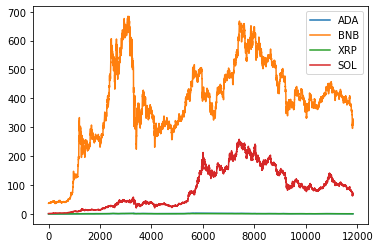

In [15]:
rets = dfcombined.pct_change()
corr= rets.corr()
dfcombined.plot()

In [16]:
X_features = dfcombined.drop('BNB',axis =1)
Y = dfcombined.BNB
import statsmodels.api as sm

In [17]:
X_features = sm.add_constant(X_features)


C:\Users\Rafay Zeeshan\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [18]:
from sklearn.model_selection import train_test_split
train_X_features, test_X_features, train_Y, test_Y = train_test_split(X_features, Y, train_size = 0.9, shuffle= False)

In [19]:
train_X_features

,const,ADA,XRP,SOL
0,1.0,0.18072,0.22448,1.5183
1,1.0,0.17975,0.22380,1.5147
2,1.0,0.18134,0.21959,1.5073
3,1.0,0.18051,0.22162,1.5442
4,1.0,0.18358,0.22382,1.5734
...,...,...,...,...
10641,1.0,0.91100,0.84510,89.0600
10642,1.0,0.92200,0.84760,90.1000
10643,1.0,0.92900,0.85220,90.9900
10644,1.0,0.94400,0.85510,91.9900


In [20]:
test_X_features

,const,ADA,XRP,SOL
10646,1.0,0.9360,0.8432,90.07
10647,1.0,0.9380,0.8472,90.25
10648,1.0,0.9420,0.8465,90.94
10649,1.0,0.9450,0.8459,90.73
10650,1.0,0.9460,0.8487,91.61
...,...,...,...,...
11824,1.0,0.6792,0.5240,71.56
11825,1.0,0.6902,0.5335,73.41
11826,1.0,0.6862,0.5243,72.26
11827,1.0,0.6608,0.5130,69.34


In [21]:
train_Y

0         37.0441
1         37.1971
2         37.3588
3         37.3764
4         37.6134
           ...   
10641    397.4000
10642    400.9000
10643    404.9000
10644    408.0000
10645    407.3000
Name: BNB, Length: 10646, dtype: float64

<AxesSubplot:>

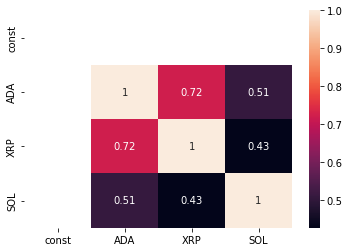

In [22]:
#to check for co-linearity
sn.heatmap(X_features.corr(), annot=True)

In [23]:
crypto_model = sm.OLS(train_Y,train_X_features).fit()
crypto_model
print(crypto_model.summary())

# Model obtained via linear regression: BNB=55.4563-42.9605ADA+359.5780XRP+1.0079SOL+error term

                            OLS Regression Results                            
Dep. Variable:                    BNB   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                 1.785e+04
Date:                Tue, 10 May 2022   Prob (F-statistic):               0.00
Time:                        18:05:03   Log-Likelihood:                -59249.
No. Observations:               10646   AIC:                         1.185e+05
Df Residuals:                   10642   BIC:                         1.185e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         55.6461      1.786     31.163      0.0

In [24]:
#this shows that BNB = 55.3230  - 41.9858 ADA + 359.1931XRP + 0.9960 SOL
#Spread then equals = BNB + 41.9858 ADA - 359.1931XRP - 0.9960 SOL

In [25]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(x):

#augmented Dickey–Fuller test:
#Ho. Presence of unit root in observable price series.
#H1. Unit root does not exist in observable price series

    adf=adfuller(x)
    print('ADF Statistic: %f'%adf[0])
    print('p-value: %f'%adf[1])
    pvalue=adf[1]
    for key,value in adf[4].items():
         if adf[0]>value:
            print("Residuals are non-stationary")
            break
         else:
            print("Residuals are stationary")
            break;
    print('Critical values:')
    for key,value in adf[4].items():
        print('\t%s: %.3f ' % (key, value))
        

print("1.SOL")
test1 = train_X_features["SOL"]
test_stationarity(test1)

print("2.ADA")
test2 = train_X_features["ADA"]
test_stationarity(test2)

print("3.XRP")
test3 = train_X_features["XRP"]
test_stationarity(test3)

print("4.BNB")
test4 = train_Y
test_stationarity(test4)


#based on significance level of 5%, null hypothesis is not rejected, so residuals are not stationary according to the ADF test
#We will use ADF tests on differences to reject the null hypothesis in further testing
# DIFFERENCING TO BE DONE



1.SOL
ADF Statistic: -1.315477
p-value: 0.622062
Residuals are non-stationary
Critical values:
	1%: -3.431 
	5%: -2.862 
	10%: -2.567 
2.ADA
ADF Statistic: -2.126964
p-value: 0.233811
Residuals are non-stationary
Critical values:
	1%: -3.431 
	5%: -2.862 
	10%: -2.567 
3.XRP
ADF Statistic: -2.490561
p-value: 0.117788
Residuals are non-stationary
Critical values:
	1%: -3.431 
	5%: -2.862 
	10%: -2.567 
4.BNB
ADF Statistic: -2.332132
p-value: 0.161814
Residuals are non-stationary
Critical values:
	1%: -3.431 
	5%: -2.862 
	10%: -2.567 


In [26]:
# SPREAD = BNB + 41.9858 ADA - 359.1931XRP - 0.9960 SOL
# This is the portfolio used for trading in our case
# we will use this spread to calculate our profits

In [27]:
#PHILLIPS PERON TEST 
x=list(df_train.columns)
for curr in x:
    curr
    php_ct = PhillipsPerron(df_train[curr], trend = 'ct')
    php_ct.summary()

'ADA'

Test Statistic,-1.625
P-value,0.782
Lags,39


'BNB'

Test Statistic,-1.852
P-value,0.679
Lags,39


'XRP'

Test Statistic,-2.332
P-value,0.416
Lags,39


'SOL'

Test Statistic,-0.942
P-value,0.951
Lags,39


In [28]:
#KPSS TEST
#Ho: Unit root does not exist in observable price series
#Ha: Presence of unit root in observable price series.
#KPSS test: accepting the null-hypothesis --> residuals are stationary

from statsmodels.tsa.stattools import kpss


def kpss_test(timeseries):
    print("KPSS Test Results")
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        output["Critical Value (%s)" % key] = value
    print(output)




In [29]:
kpss_test(train_X_features["SOL"])

KPSS Test Results
Test Statistic           11.653241
p-value                   0.010000
Lags Used                60.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\Rafay Zeeshan\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [30]:
kpss_test(train_X_features["ADA"])

KPSS Test Results
Test Statistic            4.301349
p-value                   0.010000
Lags Used                60.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\Rafay Zeeshan\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [31]:
kpss_test(train_X_features["XRP"])

KPSS Test Results
Test Statistic            2.649238
p-value                   0.010000
Lags Used                60.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\Rafay Zeeshan\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [32]:
kpss_test(train_Y)

KPSS Test Results
Test Statistic            6.885863
p-value                   0.010000
Lags Used                60.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\Rafay Zeeshan\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [33]:
#Since P-value is greater than the significance level, 
#let’s difference the series



#Using differencing to determine stationarity of residuals via KPSS test

print ("1.SOL")
dfcombined["SOL_diff"] = dfcombined["SOL"] - dfcombined["SOL"].shift(1)
kpss_test(dfcombined["SOL_diff"].dropna())
print("")

print ("2.XRP")
dfcombined["XRP_diff"] = dfcombined["XRP"] - dfcombined["XRP"].shift(1)
kpss_test(dfcombined["XRP_diff"].dropna())
print("")

print ("3.ADA")
dfcombined["ADA_diff"] = dfcombined["ADA"] - dfcombined["ADA"].shift(1)
kpss_test(dfcombined["ADA_diff"].dropna())
print("")

print ("4.BNB")
dfcombined["BNB_diff"] = dfcombined["BNB"] - dfcombined["BNB"].shift(1)
kpss_test(dfcombined["BNB_diff"].dropna())
print("")

#Using differencing to determine stationarity of residuals via ADF test

print ("1.SOL")
print (test_stationarity(dfcombined["SOL_diff"].dropna()))
print("")

print ("2.XRP")
print (test_stationarity(dfcombined["XRP_diff"].dropna()))
print("")

print ("3.ADA")
print (test_stationarity(dfcombined["ADA_diff"].dropna()))
print("")

print ("4.BNB")
print (test_stationarity(dfcombined["BNB_diff"].dropna()))

1.SOL
KPSS Test Results
Test Statistic            0.25299
p-value                   0.10000
Lags Used                16.00000
Critical Value (10%)      0.34700
Critical Value (5%)       0.46300
Critical Value (2.5%)     0.57400
Critical Value (1%)       0.73900
dtype: float64

2.XRP
KPSS Test Results
Test Statistic           0.164447
p-value                  0.100000
Lags Used                8.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64

C:\Users\Rafay Zeeshan\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
C:\Users\Rafay Zeeshan\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(
C:\Users\Rafay Zeeshan\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(




3.ADA
KPSS Test Results
Test Statistic           0.283904
p-value                  0.100000
Lags Used                1.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64

4.BNB
KPSS Test Results
Test Statistic            0.249405
p-value                   0.100000
Lags Used                12.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64

1.SOL


C:\Users\Rafay Zeeshan\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


ADF Statistic: -18.880865
p-value: 0.000000
Residuals are stationary
Critical values:
	1%: -3.431 
	5%: -2.862 
	10%: -2.567 
None

2.XRP
ADF Statistic: -18.706157
p-value: 0.000000
Residuals are stationary
Critical values:
	1%: -3.431 
	5%: -2.862 
	10%: -2.567 
None

3.ADA
ADF Statistic: -19.057991
p-value: 0.000000
Residuals are stationary
Critical values:
	1%: -3.431 
	5%: -2.862 
	10%: -2.567 
None

4.BNB
ADF Statistic: -17.862515
p-value: 0.000000
Residuals are stationary
Critical values:
	1%: -3.431 
	5%: -2.862 
	10%: -2.567 
None


In [34]:
#AFTER DIFFERENCING ONCE WE KNOW THAT WE ARE 0 ORDER DIFFERENCING
#BECAUSE RESIDUALS ARE STATIONARY

In [35]:
test_X_features

,const,ADA,XRP,SOL
10646,1.0,0.9360,0.8432,90.07
10647,1.0,0.9380,0.8472,90.25
10648,1.0,0.9420,0.8465,90.94
10649,1.0,0.9450,0.8459,90.73
10650,1.0,0.9460,0.8487,91.61
...,...,...,...,...
11824,1.0,0.6792,0.5240,71.56
11825,1.0,0.6902,0.5335,73.41
11826,1.0,0.6862,0.5243,72.26
11827,1.0,0.6608,0.5130,69.34


In [36]:
test_Y

10646    403.8
10647    404.9
10648    405.8
10649    405.0
10650    406.1
         ...  
11824    325.7
11825    329.8
11826    325.7
11827    317.7
11828    317.6
Name: BNB, Length: 1183, dtype: float64

In [37]:
dfcombined.tail()

,ADA,BNB,XRP,SOL,SOL_diff,XRP_diff,ADA_diff,BNB_diff
11824,0.6792,325.7,0.5240,71.56,2.46,0.0054,0.0067,5.4
11825,0.6902,329.8,0.5335,73.41,1.85,0.0095,0.0110,4.1
11826,0.6862,325.7,0.5243,72.26,-1.15,-0.0092,-0.0040,-4.1
11827,0.6608,317.7,0.5130,69.34,-2.92,-0.0113,-0.0254,-8.0
11828,0.6605,317.6,0.5116,68.76,-0.58,-0.0014,-0.0003,-0.1


In [38]:
#making the test data frame
df_test = pd.DataFrame()
df_test['const'] = test_X_features['const']
df_test['ADA'] = test_X_features['ADA']
df_test['XRP'] = test_X_features['XRP']
df_test['SOL'] = test_X_features['SOL']
df_test['BNB'] = test_Y

,const,ADA,XRP,SOL,BNB,Spread
10646,1.0,0.9360,0.8432,90.07,403.8,50.517367
10647,1.0,0.9380,0.8472,90.25,404.9,50.085286
10648,1.0,0.9420,0.8465,90.94,405.8,50.717424
10649,1.0,0.9450,0.8459,90.73,405.0,50.468058
10650,1.0,0.9460,0.8487,91.61,406.1,49.727823
...,...,...,...,...,...,...
11824,1.0,0.6792,0.5240,71.56,325.7,94.725811
11825,1.0,0.6902,0.5335,73.41,329.8,94.032720
11826,1.0,0.6862,0.5243,72.26,325.7,94.214754
11827,1.0,0.6608,0.5130,69.34,317.7,92.115516


Text(0.5, 0, 'range')

Text(0, 0.5, 'spread')

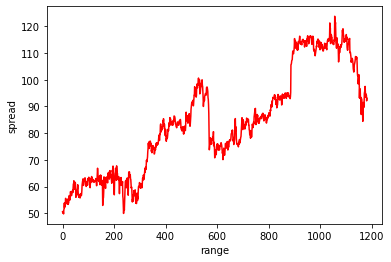

In [39]:
#BNB + 41.9858 ADA - 359.1931XRP - 0.9960 SOL
df_test['Spread'] = ((df_test['BNB']) + (df_test['ADA']*41.9858) - (df_test['XRP']*359.1931) -(df_test['SOL']*0.9960))
df_test
y=df_test['Spread'].values
x=range(len(y))
plt.plot(x,y,color='red')
plt.xlabel("range")
plt.ylabel('spread')

In [40]:
#adding the spread column
dfspread=pd.DataFrame()
dfspread['Spread']= ((df_train['BNB']) + (df_train['ADA']*41.9858) - (df_train['XRP']*359.1931) -(df_train['SOL']*0.9960))
mu=df_test['Spread'].mean()
sig=df_test['Spread'].std()
mu
sig
dfspread

84.05437256401531

19.363875219468177

,Spread
0,-37.512120
1,-37.152009
2,-35.403979
3,-36.187141
4,-36.640553
...,...
10063,43.821321
10064,46.030687
10065,47.695809
10066,47.355483


In [41]:
#ARIMA MODEL BUILDING
#Predicted Yt = Constant + Linear combination Lags of Y (upto p lags) + Linear Combination of Lagged forecast errors (upto q lags)


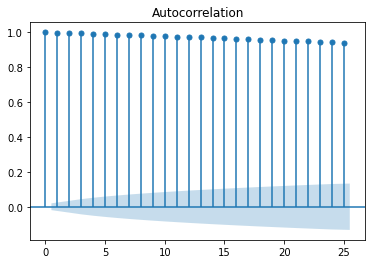

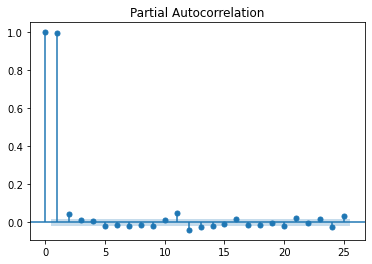

In [42]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
acf  = plot_acf(dfspread['Spread'], lags=25)
pacf = plot_pacf(dfspread['Spread'], lags=25)

In [43]:
from statsmodels.tsa.ar_model import AutoReg

In [44]:
import statsmodels.api as sm
ar_model = sm.tsa.ARIMA(dfspread["Spread"], (1,1,0)).fit(disp=-1)
print(ar_model.summary())
sm.stats.acorr_ljungbox(ar_model.resid, lags=[5], return_df=True)

C:\Users\Rafay Zeeshan\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:               D.Spread   No. Observations:                10067
Model:                 ARIMA(1, 1, 0)   Log Likelihood              -29201.500
Method:                       css-mle   S.D. of innovations              4.401
Date:                Tue, 10 May 2022   AIC                          58408.999
Time:                        18:05:13   BIC                          58430.650
Sample:                             1   HQIC                         58416.326
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0084      0.042      0.200      0.842      -0.074       0.091
ar.L1.D.Spread    -0.0448      0.010     -4.504      0.000      -0.064      -0.025
                                    

,lb_stat,lb_pvalue
5,7.073599,0.215224


In [45]:
nom=100000
nom1=100000
nom2=100000
nom3=100000
nom4=100000
nom5=100000
spread_units=[0,0,0,0,0]
profits=[0,0,0,0,0]
curr_values=df_test.tail(1)
for ind in df_test.index:
    #+-0.5
    if df_test["Spread"][ind]>mu+0.5*sig:
        if spread_units[0]!=0:
            nom1=spread_units[0]*((df_test["BNB"][ind])+41.9858*(df_test["ADA"][ind])-359.1931*(df_test["XRP"][ind])-0.9960*(df_test["SOL"][ind]))
            spread_units[0]=0
    elif df_test["Spread"][ind]<mu-0.5*sig:
        if spread_units[0]==0:
            spread_units[0]=nom1/df_test["Spread"][ind]

    #+-0.75
    if df_test["Spread"][ind]>mu+0.75*sig:
        if spread_units[1]!=0:
            nom2=spread_units[1]*((df_test["BNB"][ind])+41.9858*(df_test["ADA"][ind])-359.1931*(df_test["XRP"][ind])-0.9960*(df_test["SOL"][ind]))
            spread_units[1]=0
    elif df_test["Spread"][ind]<mu-0.75*sig:
        if spread_units[1]==0:
            spread_units[1]=nom2/df_test["Spread"][ind]

    #+-1
    if df_test["Spread"][ind]>mu+sig:
        if spread_units[2]!=0:
            nom3=spread_units[2]*((df_test["BNB"][ind])+41.9858*(df_test["ADA"][ind])-359.1931*(df_test["XRP"][ind])-0.9960*(df_test["SOL"][ind]))
            spread_units[2]=0
    elif df_test["Spread"][ind]<mu-sig:
        if spread_units[2]==0:
            spread_units[2]=nom3/df_test["Spread"][ind]

    #+-1.25
    if df_test["Spread"][ind]>mu+1.25*sig:
        if spread_units[3]!=0:
            nom4=spread_units[3]*((df_test["BNB"][ind])+41.9858*(df_test["ADA"][ind])-359.1931*(df_test["XRP"][ind])-0.9960*(df_test["SOL"][ind]))
            spread_units[3]=0
    elif df_test["Spread"][ind]<mu-1.25*sig:
        if spread_units[3]==0:
            spread_units[3]=nom4/df_test["Spread"][ind]
    #+-1.5
    if df_test["Spread"][ind]>mu+1.5*sig:
        if spread_units[4]!=0:
            nom5=spread_units[4]*((df_test["BNB"][ind])+41.9858*(df_test["ADA"][ind])-359.1931*(df_test["XRP"][ind])-0.9960*(df_test["SOL"][ind]))
            spread_units[4]=0
    elif df_test["Spread"][ind]<mu-1.5*sig:
        if spread_units[4]==0:
            spread_units[4]=nom5/df_test["Spread"][ind]
   
for i in range(len(spread_units)):
    if spread_units[i] != 0:
        profits[i]=((curr_values["BNB"].values[0])+41.9858*(curr_values["ADA"].values[0])-359.1931*(curr_values["XRP"].values[0])-0.9960*(curr_values["SOL"].values[0]))*spread_units[i]
    else:
        profits[0]=nom1
        profits[1]=nom2
        profits[2]=nom3 
        profits[3]=nom4
        profits[4]=nom5
profits=np.array(profits)
profits-=nom
profits

array([138708.78391251,  97178.03783521, 109117.9171926 , 115748.84175753,
       128537.88124833])

In [46]:
#THE MOST PROFIT IS OBSERVED AT 0.75 STD